## 1. Derivative

Based on Andrej Karpathy's video

GitHub: https://github.com/karpathy/micrograd

YouTube: https://www.youtube.com/watch?v=VMj-3S1tku0

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

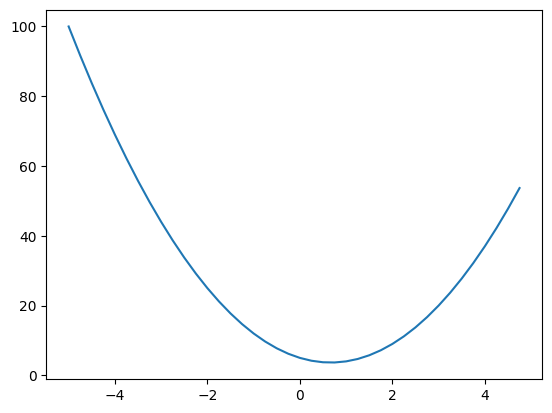

In [6]:
plt.plot(xs, ys)

In [7]:
# derivative (find the slope's direction and amount)
h = 0.0000001
x = 2/3
(f(x + h) - f(x)) / h

2.9753977059954195e-07

In [8]:
# let's get more complex
a = 2.0
b = -3.0
c = 10.0
d = a * b + c
print(d)

4.0


In [9]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
a += h
d2 = a * b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [10]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
b += h
d2 = a * b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [11]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [12]:
class Value:
    # _children to keep pointers
    # _op to see what operations were used
    # label to keep/show what each node represents
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label

    # to return a printout instead of a function
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)     # this line of code is to be able to add a constant (integer or float) by making integer -> Value(integer), as integer.data is not valid
        out = Value(self.data + other.data, (self, other), '+')

        # gradients in addition distributes the previous gradient
        def _backward():
            # refer to the first visualization
            # c.grad = d.grad
            # e.gard = d.grad
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)     # this line of code is to be able to multiply a constant (integer or float) by making integer -> Value(integer), as integer.data is not valid
        out = Value(self.data * other.data, (self, other), '*')

        # gradients in multiplication are other node's gradients multiplied by the previous gradient
        def _backward():
            # refer to the third visualization
            # x1.grad = w1.data * x1w1.grad
            # w1.grad = x1.data * x1w1.grad
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out

    def __radd__(self, other):      # other + self by switching the order of the operand, so one can do 2 + a
        return self + other

    def __rmul__(self, other):      # other * self by switching the order of the operand, so one can do 2 * a
        return self * other

    def __pow__(self, other):       # self ** other
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            self.grad += out.grad * (other * (self.data ** (other - 1)))
        out._backward = _backward

        return out

    def __truediv__(self, other):   # self / other
        return self * other**-1

    def __neg__(self):              # -self
        return self * -1

    def __sub__(self, other):       # self - other
        return self + (-other)

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        # derivative of tanh is 1 - t**2
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward

        return out

    def backward(self):

        # topological order
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [18]:
a = Value(2.0)
b = Value(3.0)

b / a

Value(data=1.5)

In [ ]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a * b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [ ]:
# using _prev returns previous data pointers (one being the outcome of a * b and another being c before adding values)
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [ ]:
# using _op to see what expression was used to make d
d._op

'+'

In [ ]:
# visualize computational graph
from graphviz import Digraph
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [ ]:
# set gradients in visualization
f.grad = 4.0
d.grad = -2.0
L.grad = 1.0
c.grad = -2.0
e.grad = -2.0
a.grad = (-2.0 * -3.0)
b.grad = (-2.0 * 2.0)

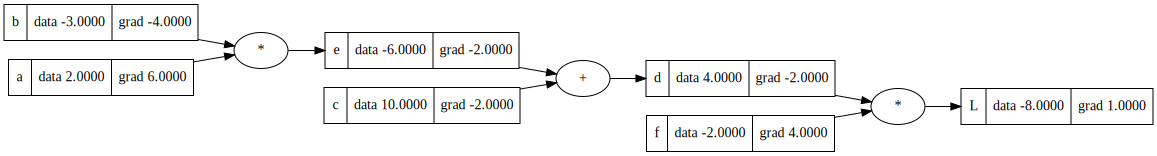

In [ ]:
# visualize forward propagation (forward pass)
draw_dot(L)

In [ ]:
# 0.01 here is a step (doing this once is one step of optimization)
# making the L go up
a.data += a.grad * 0.01
b.data += b.grad * 0.01
c.data += c.grad * 0.01
f.data += f.grad * 0.01

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


## 2. Simple Expression

In [ ]:
# function to see the gradients numerically by applying h in any local variables
def lol():
    h = 0.0001

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0 + h, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data

    print(L2, L1)
    print(L2 - L1)
    print((L2 - L1) / h)

lol()

-8.0004 -8.0
-0.0004000000000008441
-4.000000000008441


## 3. A Neuron

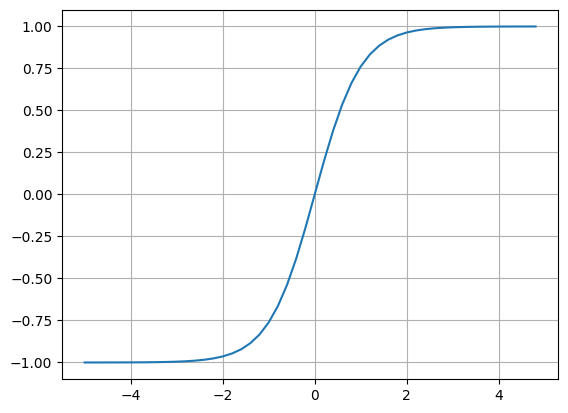

In [ ]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))
plt.grid();

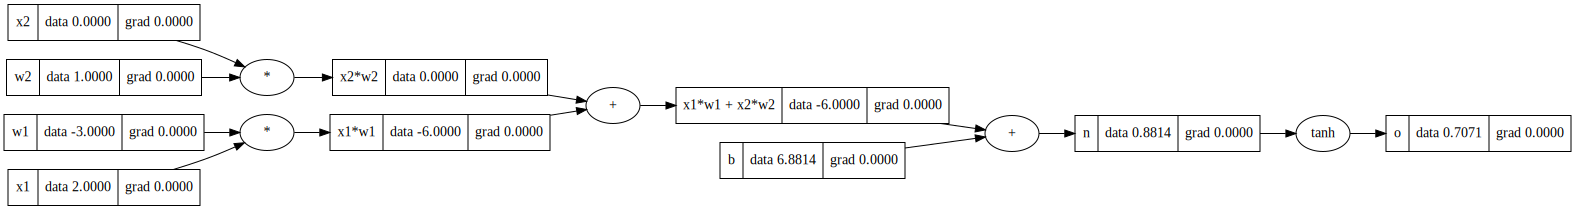

In [ ]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [ ]:
# fill in the gradients of all neurons manually
o.grad = 1.0
# o = tanh(n)
# do / dn = 1 - tanh(n)**2 where tanh(n) = o
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

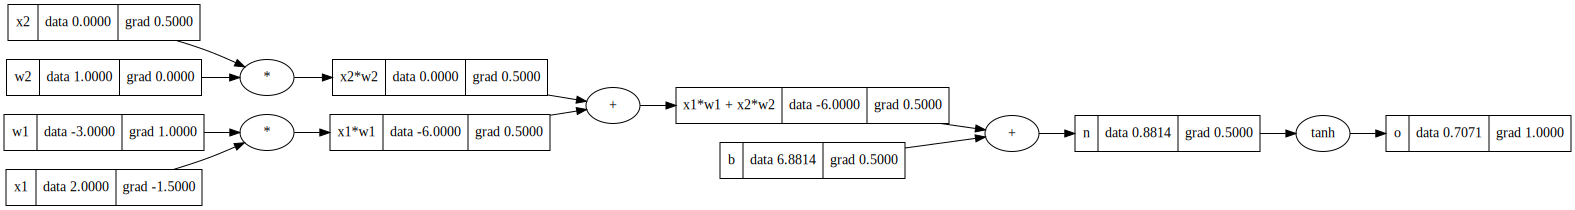

In [ ]:
draw_dot(o)

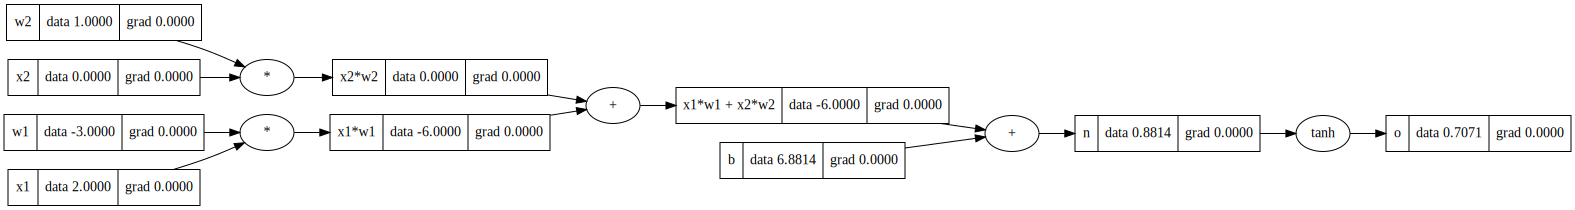

In [ ]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [ ]:
# fill in the gradients using _backward()
o.grad = 1.0
o._backward()
n._backward()
b._backward() # nothing happens as b is the leaf node
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

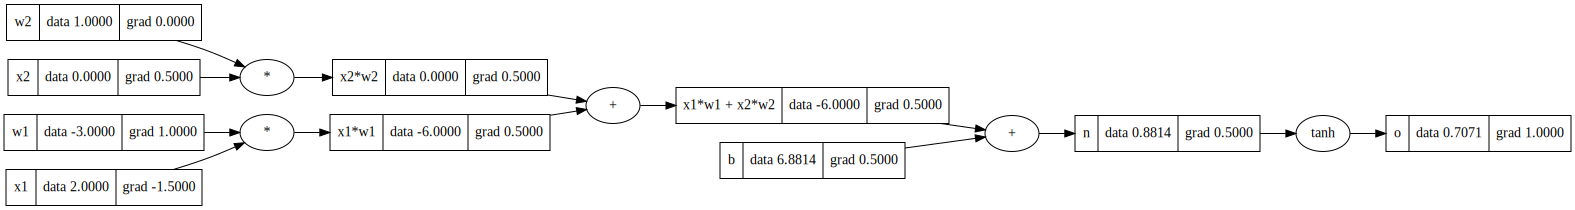

In [ ]:
draw_dot(o)

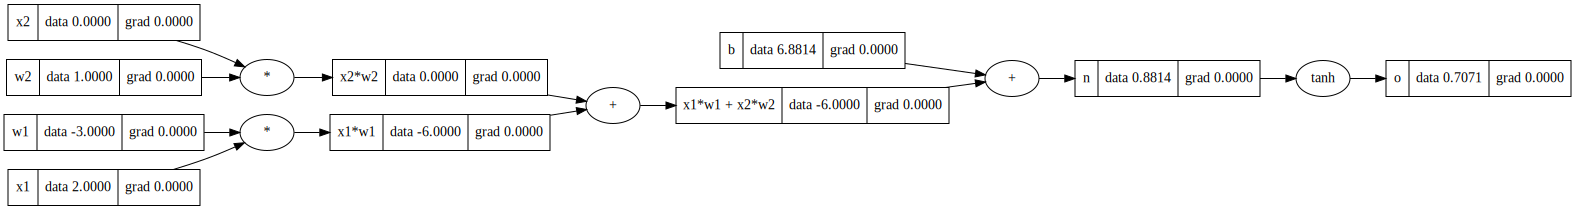

In [ ]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [ ]:
# topological order
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
# fill in the gradients using backward()
o.backward()

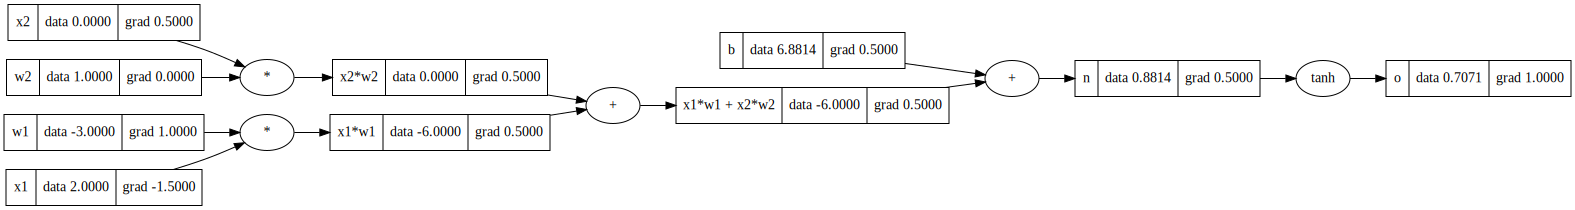

In [ ]:
draw_dot(o)

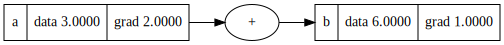

In [ ]:
# fixing a bug when one node is used multiple times
# one needs to accumulate gradients following the chain rule in multivariate
a = Value(3.0, label='a')
b = a + a; b.label='b'

b.backward()

draw_dot(b)

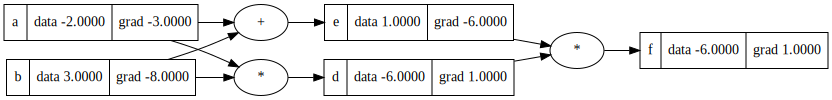

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b; d.label = 'd'
e = a + b; e.label = 'e'
f = d * e; f.label = 'f'

f.backward()

draw_dot(f)

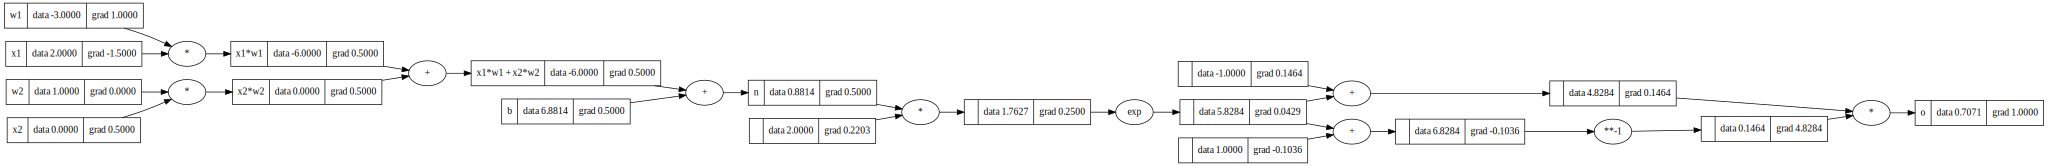

In [ ]:
# break up a tanh and add more operations in class
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ------------
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ------------
o.label = 'o'
o.backward()
draw_dot(o)

In [ ]:
# using PyTorch to implement above
import torch

x1 = torch.Tensor([2.0]).double();                  x1.requires_grad=True
x2 = torch.Tensor([0.0]).double();                  x2.requires_grad=True
w1 = torch.Tensor([-3.0]).double();                 w1.requires_grad=True
w2 = torch.Tensor([1.0]).double();                  w2.requires_grad=True
b = torch.Tensor([6.8813735870195432]).double();    b.requires_grad=True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

# o.data.item() and o.item() will produce the same results in PyTorch
# print(o.item())
print(o.data.item())
o.backward()

print('-----')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
-----
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [ ]:
import random

# computing neurons
class Neuron:
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))

    def __call__(self, x):
        # w * x + b
        act = sum((wi * xi for wi, xi, in zip(self.w, x))) + self.b
        out = act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]

# computing a single layer
class Layer:
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
        # params = []
        # for neuron in self.neurons:
        #     ps = neuron.parameters()
        #     params.extend(ps)
        # return params

# computing multi-layer perceptron (MLP)
class MLP:
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [ ]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=-0.9982089194078806)

In [ ]:
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value(data=-0.9708634688692598),
 Value(data=-0.9094093014850018),
 Value(data=0.24673579190842593)]

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.9524097064713991)

In [ ]:
# sample dataset
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [ ]:
y_pred = [n(x) for x in xs]
y_pred

[Value(data=0.9524097064713991),
 Value(data=0.6777895920347808),
 Value(data=0.8834422361933362),
 Value(data=0.8570503019262922)]

## 4. Gradient Descent

In [ ]:
# mean squared error
[(yout - ygt)**2 for ygt, yout in zip(ys, y_pred)]

[Value(data=0.002264836038138392),
 Value(data=2.8149779151402368),
 Value(data=3.5473546570769545),
 Value(data=0.020434616179364228)]

In [ ]:
# loss function to evaluate the performance of the model
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=6.385032024434694)

In [ ]:
# to minimize the loss, calculates gradients
loss.backward()

In [ ]:
# gradient of a single weight
n.layers[0].neurons[0].w[0].grad

-0.10380056730159794

In [ ]:
# value of the single weight
n.layers[0].neurons[0].w[0].data

-0.659081313217611

In [ ]:
# update weights using gradient descent
for p in n.parameters():
    p.data += -0.01 * p.grad

In [ ]:
# value of the single weight after the update
n.layers[0].neurons[0].w[0].data

-0.6580433075445951

In [ ]:
# re-calculating the network
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=6.005038280925172)

In [ ]:
# iterating the process of forward propagation and backpropagation
loss.backward()
# update weights using gradient descent
for p in n.parameters():
    p.data += -0.01 * p.grad

In [ ]:
# re-calculating the network
y_pred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))
loss

Value(data=5.035883727203086)

In [ ]:
# proper iteration
for k in range(20):
    # forward pass
    y_pred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, y_pred))

    # zero grad (setting grad back to zero)
    # without zero grad, gradients will accumulate after each step
    # and that would be having bigger step (learning rate) in each iteration
    for p in n.parameters():
        p.grad = 0.0

    # backward pass
    loss.backward()

    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad

    print(k, loss.data)

0 5.035883727203086
1 2.128521901018571
2 0.9941195173437614
3 0.49781690041107995
4 0.29730237601116327
5 0.20450703836462067
6 0.1536624026946106
7 0.1222038390962624
8 0.10103497786318835
9 0.08590528019969736
10 0.07459468686506165
11 0.0658409435127717
12 0.05887735138351743
13 0.053213047826618676
14 0.04852002460443122
15 0.044571189283395075
16 0.041204560456320774
17 0.03830162717007625
18 0.035773763621932866
19 0.03355341751150731


In [ ]:
# final output after iteration are similar to ys (desired output)
y_pred

[Value(data=0.9656755707070619),
 Value(data=-0.9281291668683437),
 Value(data=-0.8682383384511339),
 Value(data=0.9007593885747117)]